<a href="https://colab.research.google.com/github/janhavidhamak/customer-review-nlp-project/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("/content/raw_data.csv")
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0.0,0.0,4.0,1.342051e+09,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0.0,0.0,5.0,1.340150e+09,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0.0,0.0,5.0,1.336003e+09,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1.0,1.0,5.0,1.322006e+09,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
df.shape

(3000, 10)

Sample dataset is good for nlp project(Sentiment Analysis)

As it has 3000 records each form different customer with 10 features.

In [4]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03
mean,1500.500000,1.521333,1.967000,4.146333,1.289604e+09
std,866.169729,4.676127,5.310805,1.333734,5.071840e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,750.750000,0.000000,0.000000,4.000000,1.263362e+09
50%,1500.500000,0.000000,1.000000,5.000000,1.301875e+09
75%,2250.250000,2.000000,2.000000,5.000000,1.329091e+09
max,3000.000000,165.000000,168.000000,5.000000,1.351210e+09


In [5]:
df.isna().count()

,0
Id,3000
ProductId,3000
UserId,3000
ProfileName,3000
HelpfulnessNumerator,3000
HelpfulnessDenominator,3000
Score,3000
Time,3000
Summary,3000
Text,3000


- No significant missing values were observed in key columns.
- The dataset is sufficiently clean for further analysis without imputation.


In [6]:
df.duplicated(subset="Text")

,0
0,False
1,False
2,False
3,False
4,False
...,...
2995,False
2996,False
2997,False
2998,False


- No duplicate reviews observed.



In [7]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=f73f523c2f11bee0ffe648c2f89c0c7e0b4ff834b7ad093a5319a45069b6496f
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [8]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False

df["is_english"] = df["Text"].apply(is_english)
df["is_english"]


,is_english
0,True
1,True
2,True
3,True
4,True
...,...
2995,True
2996,True
2997,True
2998,True


- All reveiw text is in English.

- Data quality check:
No spike at zero length → text data is clean

- This step improves model accuracy and reduces language-related noise.

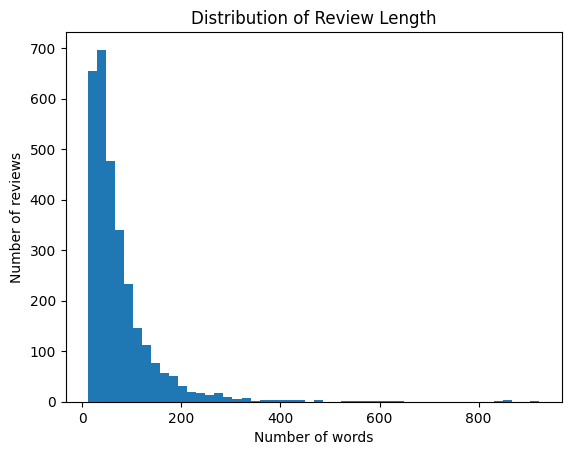

In [9]:
def count_words(x):
    return len(x.split())

df["review_length"] = df["Text"].apply(count_words)

import matplotlib.pyplot as plt

plt.hist(df["review_length"], bins=50)
plt.xlabel("Number of words")
plt.ylabel("Number of reviews")
plt.title("Distribution of Review Length")
plt.show()


Insights:
Most customer reviews are short, suggesting concise user feedback.

Right-skewed distribution:
Many short reviews
Few very long reviews

Presence of outliers:
Some reviews are unusually long
These can introduce noise


In [10]:
df = df.drop(columns = ["Time"])

In [11]:
df.to_csv("cleaned_data.csv", index = False)